<a href="https://colab.research.google.com/github/babakansari/DeepLearning/blob/master/RNN_for_autocomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural-network experiment for Auto Complete - Babak Ansari-Jaberi

https://www.youtube.com/watch?v=iMIWee_PXl8

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [0]:
Data = [[[(i+j)/100] for i in range(5)] for j in range (100)]
Target = [(i+5)/100 for i in range(100)]


In [0]:
data = np.array(Data, dtype=float)
target = np.array(Target, dtype=float)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = 4 )

In [146]:
model = Sequential()
model.add(LSTM(1, batch_input_shape=(None, 5, 1), return_sequences=True,  activation='tanh'))
model.add(LSTM(50,  activation='tanh', return_sequences=False))
model.add(Dense(1))

ValueError: ignored

In [0]:
#model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['accuracy'])
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [144]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 5, 1)              12        
_________________________________________________________________
lstm_27 (LSTM)               (None, 50)                10400     
Total params: 10,412
Trainable params: 10,412
Non-trainable params: 0
_________________________________________________________________


In [145]:
history = model.fit(x_train, y_train, epochs = 40, validation_data=(x_test, y_test))

ValueError: ignored

In [0]:
results = model.predict(x_test)

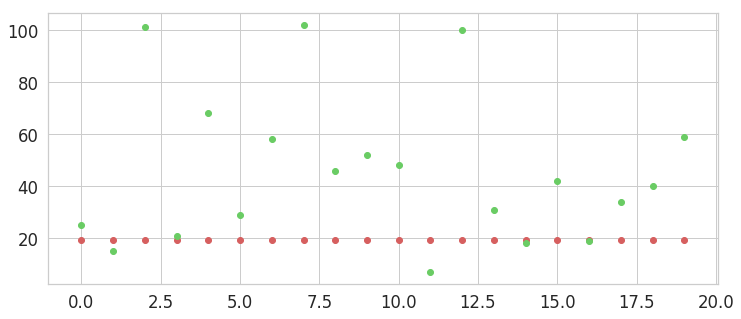

In [140]:
plt.scatter(range(20), results, c= 'r')
plt.scatter(range(20), y_test, c= 'g')
plt.show()

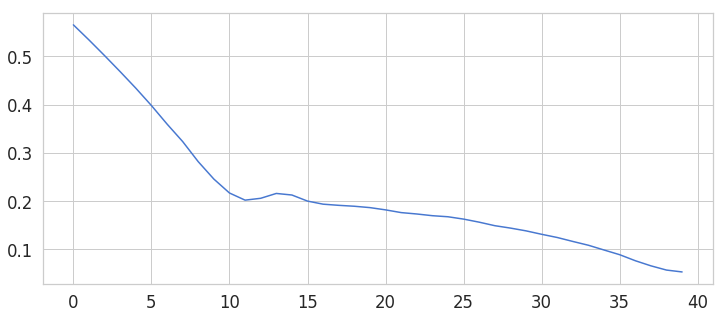

In [121]:
plt.plot(history.history['loss'])
plt.show()